In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pickle
from sklearn.metrics import roc_curve, auc

In [3]:
# import data  -- can change directory location -- will have to update plot + filenames accordingly
train_input_all = np.loadtxt('./BIC1/train_input_data.txt')
train_output_all =  np.loadtxt('./BIC1/train_output_data.txt')
test_input = np.loadtxt('./BIC1/test_input_data.txt')
test_output = np.loadtxt('./BIC1/test_output_data.txt')

train_input_all

array([[4., 4., 1., ..., 4., 4., 4.],
       [4., 1., 4., ..., 1., 1., 4.],
       [1., 4., 1., ..., 1., 1., 1.],
       ...,
       [1., 4., 4., ..., 1., 1., 4.],
       [1., 1., 4., ..., 1., 1., 1.],
       [1., 1., 4., ..., 1., 1., 4.]])

SVM Model

In [4]:
num_train_li = [50]
for num_train in num_train_li:
	print('starting num_train:',num_train)
	train_input = train_input_all[0:num_train,:]
	train_output = train_output_all[0:num_train]

    # create models --> SVM, NN, GPC 
	create_all_models = True

	# SVM model --> 
	create_svm_model = True and create_all_models
	if create_svm_model == True:
		# create SVM model 
		clf_svm = svm.SVC()
		clf_svm.fit(train_input, train_output)
		# save SVM model
		filename = 'pickled_svm_%itrain.sav'%(num_train)
		pickle.dump(clf_svm,open(filename,'wb'))
	else:
		# load SVM model 
		filename = 'pickled_svm_%itrain.sav'%(num_train)
		clf_svm = pickle.load( open(filename,'rb'))
	
	y_score_svm = clf_svm.decision_function(test_input)
	fpr_svm, tpr_svm, _  = roc_curve(test_output, y_score_svm)
	roc_auc_svm = auc(fpr_svm, tpr_svm)

	print(roc_auc_svm)

starting num_train: 50
0.8466802520605988


NN Model


In [5]:
from sklearn.neural_network import MLPClassifier

for num_train in num_train_li:
    create_nn_model = True and create_all_models
    if create_nn_model == True:
        clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200,200,200), random_state=1)
        clf_nn.fit(train_input, train_output)
        filename = 'pickled_nn_%itrain.sav'%(num_train)
        pickle.dump(clf_nn,open(filename,'wb'))
    else:
        filename = 'pickled_nn_%itrain.sav'%(num_train)
        clf_nn = pickle.load( open(filename,'rb'))
        
    y_score_nn = clf_nn.predict_proba(test_input)[:,1]
    fpr_nn, tpr_nn, _  = roc_curve(test_output, y_score_nn)
    roc_auc_nn = auc(fpr_nn, tpr_nn)
    
    print(roc_auc_nn)


0.8698340789529861


Naive Bayes


In [6]:
from sklearn.naive_bayes import GaussianNB

for num_train in num_train_li:
    create_nb_model = True and create_all_models
    if create_nb_model == True:
        clf_nb = GaussianNB()
        clf_nb.fit(train_input, train_output)
        filename = 'pickled_nb_%itrain.sav'%(num_train)
        pickle.dump(clf_nn,open(filename,'wb'))
    else:
        filename = 'pickled_nb_%itrain.sav'%(num_train)
        clf_nb = pickle.load( open(filename,'rb'))
        
    y_score_nb = clf_nb.predict_proba(test_input)[:,1]
    fpr_nb, tpr_nb, _  = roc_curve(test_output, y_score_nb)
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    
    print(roc_auc_nb)


0.7769360628743724


Plot the Graph

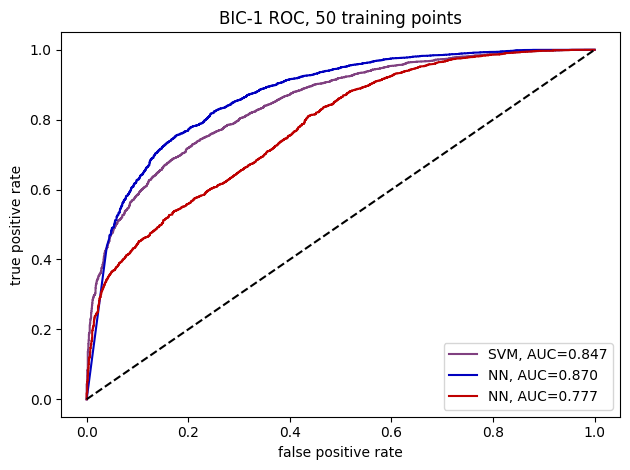

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
for num_train in num_train_li:
    
    fig = plt.figure()
    plt.plot(fpr_svm,tpr_svm,color=(.5,.25,.5),label='SVM, AUC=%0.3f'%(roc_auc_svm))
    plt.plot(fpr_nn,tpr_nn,color=(0,0,0.75),label='NN, AUC=%0.3f'%(roc_auc_nn))
    plt.plot(fpr_nb,tpr_nb,color=(.75,0,0),label='NN, AUC=%0.3f'%(roc_auc_nb))
    plt.plot([0,1],[0,1],'k--') 

    plt.legend()
    plt.title('BIC-1 ROC, %i training points'%(num_train))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.tight_layout()

    plt.savefig('BIC1_ROC_%i_num_train'%(num_train))